In [71]:
import sys
sys.path.append("../../../../src")
import nanonets
import nanonets_utils
import matplotlib.pyplot as plt
import matplotlib as mpl
import scienceplots
import numpy as np
from tqdm import tqdm
%matplotlib inline

plt.style.use(["science","bright","grid"])

In [72]:
N_p                 = 5
def run_magic_cable(time_steps, voltages, topology_parameter, radius=1e6, eq_steps=0):

    np_info2 = {
        'np_index'      : [topology_parameter["Nx"]-1], 
        'mean_radius'   : radius,
        'std_radius'    : 0.0
    }

    target_electrode    = len(topology_parameter["e_pos"])-1
    sim_class           = nanonets.simulation(topology_parameter=topology_parameter, np_info2=np_info2)
    sim_class.run_var_voltages(voltages=voltages, time_steps=time_steps, target_electrode=target_electrode, stat_size=10, save=False, eq_steps=eq_steps)
    results             = sim_class.return_output_values()

    return results

if topology_parameter["electrode_type"][-1] == 'floating':
    potential = True
else:
    potential = False

In [73]:
# Voltage Paramter
N_voltages              = 1000
amplitudes              = [0.1,0.0]
frequencies             = [1e5,0.0]
time_step               = 1e-7
time_steps, voltages    = nanonets_utils.sinusoidal_voltages(N_samples=N_voltages, topology_parameter=topology_parameter,
                                                            amplitudes=amplitudes, frequencies=frequencies, time_step=time_step)

In [74]:
radius  = 1e5 #[10,20,40,80,160,320,640,1280,2560,5120,10240,20480,40960,81920,163840]
results = []
for N_p in [2,4,6,8,10]:
    topology_parameter  = {
        "Nx"                : N_p,
        "Ny"                : 1,
        "Nz"                : 1,
        "e_pos"             : [[0,0,0],[N_p-1,0,0]],
        "electrode_type"    : ['constant','floating']
    }
    val     = run_magic_cable(time_steps, voltages, topology_parameter, radius, 0)
    results.append(val)

<>:20: SyntaxWarning: invalid escape sequence '\m'
<>:33: SyntaxWarning: invalid escape sequence '\c'
<>:34: SyntaxWarning: invalid escape sequence '\c'
<>:35: SyntaxWarning: invalid escape sequence '\c'
<>:36: SyntaxWarning: invalid escape sequence '\c'
<>:20: SyntaxWarning: invalid escape sequence '\m'
<>:33: SyntaxWarning: invalid escape sequence '\c'
<>:34: SyntaxWarning: invalid escape sequence '\c'
<>:35: SyntaxWarning: invalid escape sequence '\c'
<>:36: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipykernel_1222/4124319525.py:20: SyntaxWarning: invalid escape sequence '\m'
  ax.set_xlabel('$t$ [$\mu$s]')
/tmp/ipykernel_1222/4124319525.py:33: SyntaxWarning: invalid escape sequence '\c'
  ax.vlines(3*f1, y_min, y_max, colors='grey', ls='--', label='$3 \cdot f$')
/tmp/ipykernel_1222/4124319525.py:34: SyntaxWarning: invalid escape sequence '\c'
  ax.vlines(5*f1, y_min, y_max, colors='grey', ls='--', label='$5 \cdot f$')
/tmp/ipykernel_1222/4124319525.py:35: SyntaxWarning: inval

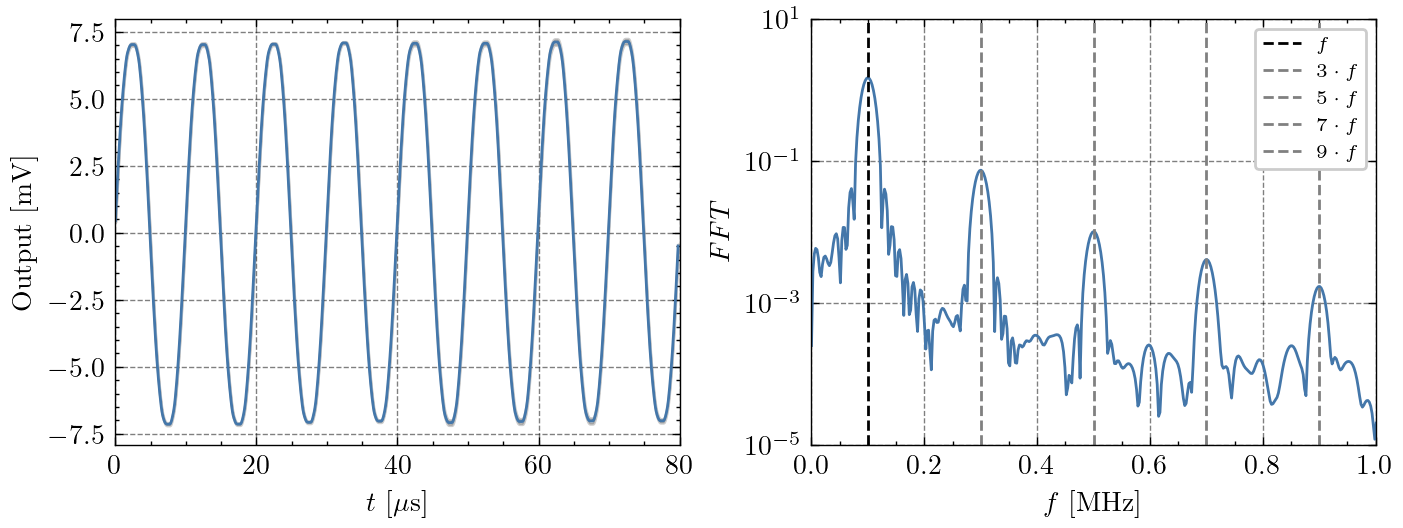

In [69]:
y_min   = 0.00001
y_max   = 10
f1      = 0.1
eq_step = 200
val_eq  = val[eq_step:]
t_vals  = time_steps[:-(eq_step+1)]

fig = plt.figure(dpi=200, layout='constrained')
fig.set_figwidth(fig.get_figwidth()*2)
ax  = fig.add_subplot(1,2,1)

if potential:
    ax.plot(t_vals*1e6, val_eq[:,2]*1000)
    ax.fill_between(t_vals*1e6, val_eq[:,2]*1000-val_eq[:,3]*1000,
                    val_eq[:,2]*1000+val_eq[:,3]*1000, color='black', alpha=0.2)
else:
    ax.plot(t_vals*1e6, val_eq[:,2]/1000)
    ax.fill_between(t_vals*1e6, val_eq[:,2]/1000-val_eq[:,3]/1000,
                    val_eq[:,2]/1000+val_eq[:,3]/1000, color='black', alpha=0.2)
ax.set_xlabel('$t$ [$\mu$s]')
if potential:
    ax.set_ylabel('Output [mV]')
else:
    ax.set_ylabel('Output [nA]')
ax.set_xlim(0,80)

ax      = fig.add_subplot(1,2,2)
signal  = val_eq[:,2]
xf, f   = nanonets_utils.fft(signal=signal, dt=time_step, n_padded=4096)

ax.plot(xf/1e6 ,f)
ax.vlines(f1, y_min, y_max, colors='black', ls='--', label='$f$')
ax.vlines(3*f1, y_min, y_max, colors='grey', ls='--', label='$3 \cdot f$')
ax.vlines(5*f1, y_min, y_max, colors='grey', ls='--', label='$5 \cdot f$')
ax.vlines(7*f1, y_min, y_max, colors='grey', ls='--', label='$7 \cdot f$')
ax.vlines(9*f1, y_min, y_max, colors='grey', ls='--', label='$9 \cdot f$')
ax.set_xlim(0,1)
ax.set_ylim(y_min, y_max)
ax.set_xlabel("$f$ [MHz]")
ax.set_ylabel("$FFT$")
ax.set_yscale('log')
ax.legend(ncol=1, frameon=True, fontsize='x-small', framealpha=1)